# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

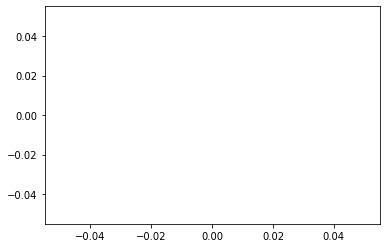

In [2]:
plt.plot()

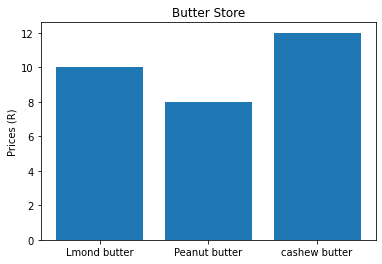

In [10]:
#make a plot from dictionary
butter_prices = {"Lmond butter" : 10,
                "Peanut butter": 8,
                "cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(butter_prices.keys(), butter_prices.values())
ax.set(title="Butter Store",
      ylabel="Prices (R)");

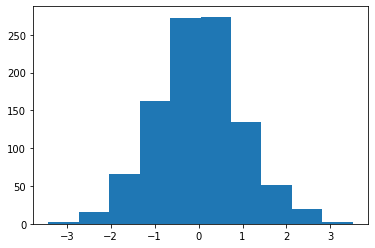

In [12]:
# making data for histogram
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Multiply plots

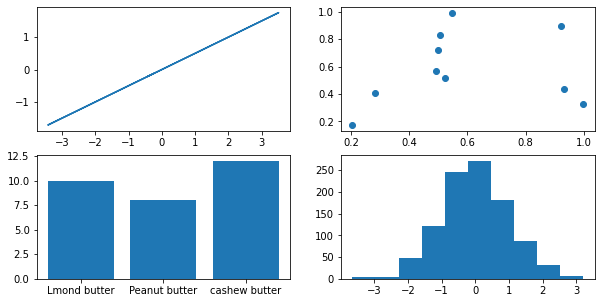

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))
# plot to each a different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(butter_prices.keys(), butter_prices.values())
ax4.hist(np.random.randn(1000));

## Plotting from Pandas DataFrame

In [23]:
# Make a dataframe
heart_data = pd.read_csv("13.1 heart-disease.csv.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


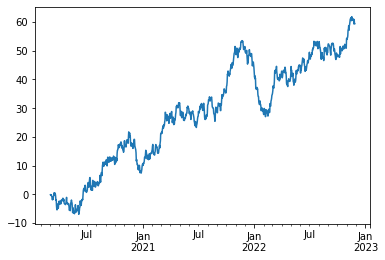

In [31]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("3/3/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

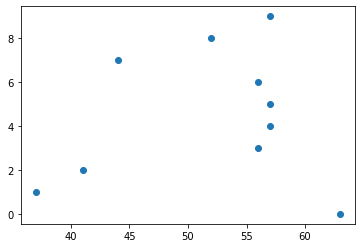

In [78]:
heart_data = heart_data.head(10)
axi =heart_data["age"]
ayi = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
fig, ax = plt.subplots()
ax.scatter(axi, list(ayi))

In [80]:
# Plotting bar graph from dataframe
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.922575,0.807154,0.295615,0.736865
1,0.292724,0.915691,0.899054,0.927794
2,0.768271,0.426708,0.792406,0.183209
3,0.045434,0.041897,0.018125,0.820311
4,0.711016,0.226323,0.840710,0.821785
5,0.848092,0.845813,0.949596,0.411262
6,0.707506,0.215345,0.682438,0.089974
7,0.966359,0.386777,0.216822,0.193044
8,0.521802,0.713792,0.865368,0.405799
9,0.670775,0.778845,0.438926,0.143082


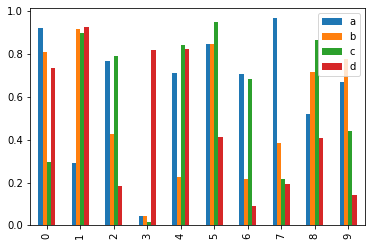

In [82]:
df.plot.bar();

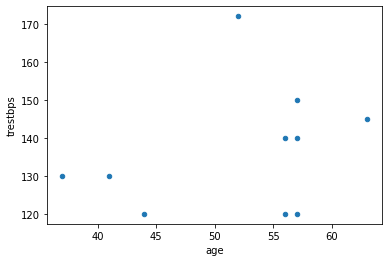

In [86]:
heart_data.plot(x="age", y="trestbps", kind="scatter")

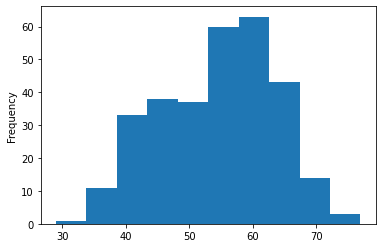

In [91]:
heart_d = pd.read_csv("13.1 heart-disease.csv.csv")
heart_d["age"].plot.hist(bins=10);

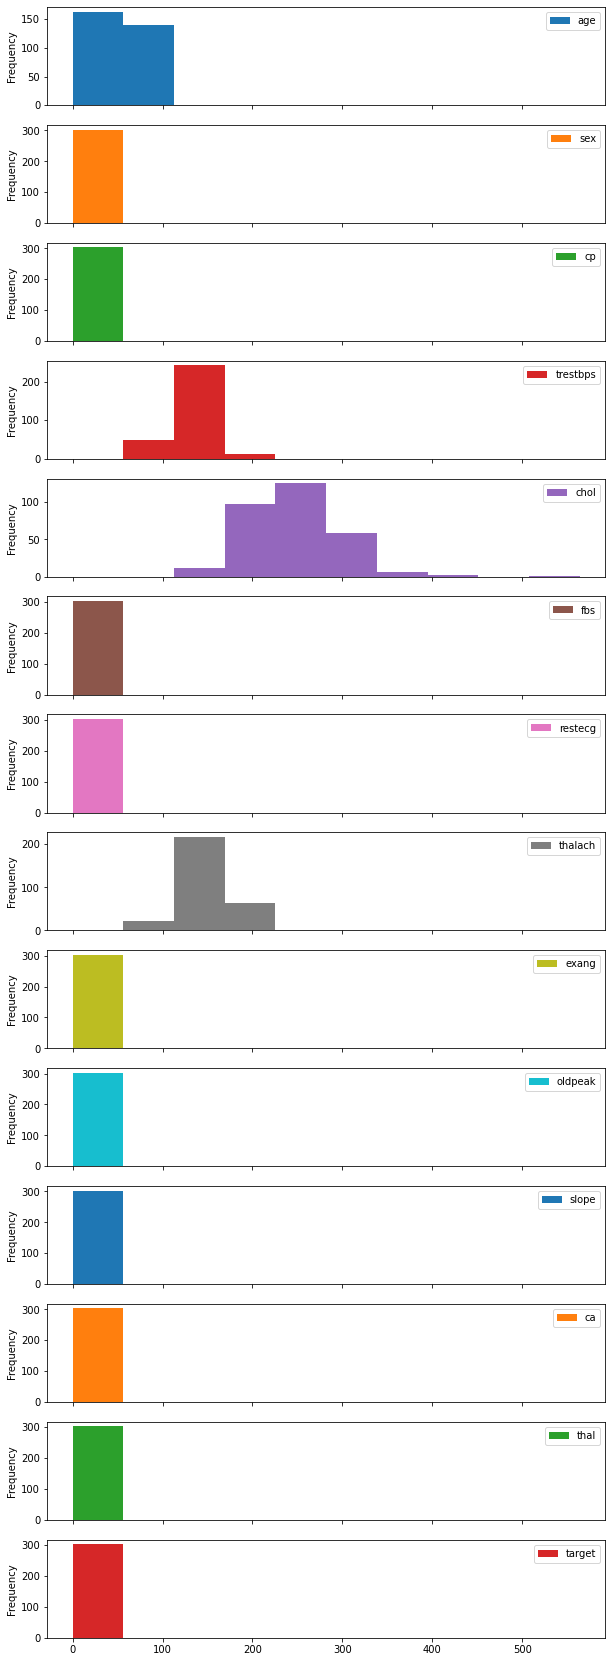

In [94]:
heart_d.head()
heart_d.plot.hist(figsize=(10, 30), subplots=True);

## Plotting more advanced data using oo method

In [98]:
over_50 = heart_d[heart_d["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


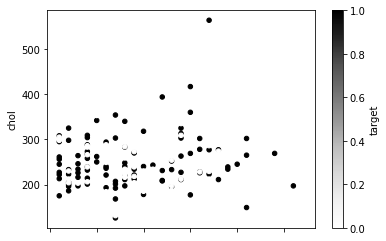

In [101]:
# Pyplot method
over_50.plot(kind='scatter',
         x='age',
         y='chol',
         c='target');

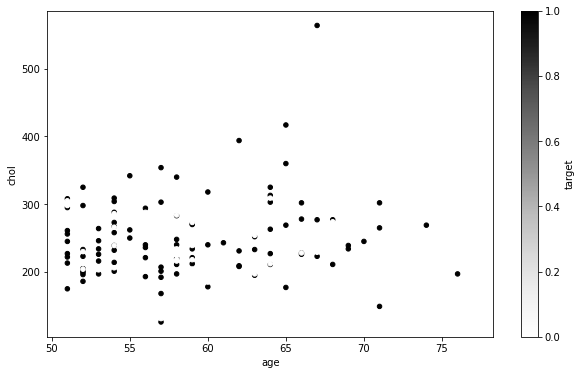

In [104]:
# OO method mixed with pyplot
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

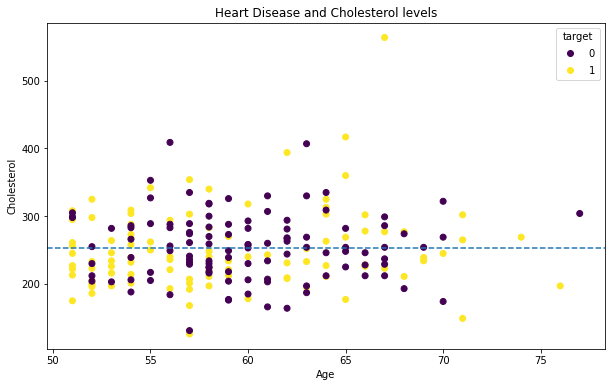

In [109]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# customize the plot
ax.set(title="Heart Disease and Cholesterol levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--');